In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('Latest FRS -2-modified.csv')
df.head()

,Financial Year,Gender of the Adult,Age band of the Adult,Disability Status of the Adult (dis),"Employment Status of the Adult (high level breakdowns) (emp, ftpt)",Government office region of the Household in the United Kingdom,"Adult total, net Income received from all sources, in bands, in latest prices (weekly, CPI adjusted real terms) (colpall, cpi, dividend, inc, netinc, real, sc)",Count
0,2022-23,Male,16 to 24 (adult) (adult),Not a disabled child / adult / person,Employee,North East (E12000001),Less than £50,..
1,2022-23,NaN,NaN,NaN,NaN,NaN,£50 - £99.99,..
2,2022-23,NaN,NaN,NaN,NaN,NaN,£100 - £149.99,..
3,2022-23,NaN,NaN,NaN,NaN,NaN,£150 - £199.99,4762
4,2022-23,NaN,NaN,NaN,NaN,NaN,£200 - £249.99,4424


In [28]:
# Filling missing values in the 'Gender of the Adult', 'Age band of the 
# Adult', 'Disability Status of the Adult (dis)', 'Employment Status of 
# the Adult (high level breakdowns) (emp, ftpt)', 'Government office 
# region of the Household in the United Kingdom' columns.
for col in enumerate(df.columns.to_list()[1:-2]):
    df[col[1]] = df[col[1]].ffill()

df.head()

,Financial Year,Gender of the Adult,Age band of the Adult,Disability Status of the Adult (dis),"Employment Status of the Adult (high level breakdowns) (emp, ftpt)",Government office region of the Household in the United Kingdom,"Adult total, net Income received from all sources, in bands, in latest prices (weekly, CPI adjusted real terms) (colpall, cpi, dividend, inc, netinc, real, sc)",Count
0,2022-23,Male,16 to 24 (adult) (adult),Not a disabled child / adult / person,Employee,North East (E12000001),Less than £50,..
1,2022-23,Male,16 to 24 (adult) (adult),Not a disabled child / adult / person,Employee,North East (E12000001),£50 - £99.99,..
2,2022-23,Male,16 to 24 (adult) (adult),Not a disabled child / adult / person,Employee,North East (E12000001),£100 - £149.99,..
3,2022-23,Male,16 to 24 (adult) (adult),Not a disabled child / adult / person,Employee,North East (E12000001),£150 - £199.99,4762
4,2022-23,Male,16 to 24 (adult) (adult),Not a disabled child / adult / person,Employee,North East (E12000001),£200 - £249.99,4424


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 8 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                           --------------  ----- 
 0   Financial Year                                                                                                                                                   19440 non-null  object
 1   Gender of the Adult                                                                                                                                              19440 non-null  object
 2   Age band of the Adult                                                                                                              

In [30]:
# Checking for duplicates.
duplicates = df[df.duplicated()]
duplicates

,Financial Year,Gender of the Adult,Age band of the Adult,Disability Status of the Adult (dis),"Employment Status of the Adult (high level breakdowns) (emp, ftpt)",Government office region of the Household in the United Kingdom,"Adult total, net Income received from all sources, in bands, in latest prices (weekly, CPI adjusted real terms) (colpall, cpi, dividend, inc, netinc, real, sc)",Count


In [31]:
# Descriptive statistics for numerical columns.
df.describe()

,Financial Year,Gender of the Adult,Age band of the Adult,Disability Status of the Adult (dis),"Employment Status of the Adult (high level breakdowns) (emp, ftpt)",Government office region of the Household in the United Kingdom,"Adult total, net Income received from all sources, in bands, in latest prices (weekly, CPI adjusted real terms) (colpall, cpi, dividend, inc, netinc, real, sc)",Count
count,19440,19440,19440,19440,19440,19440,19440,19440
unique,1,2,9,2,5,12,9,4852
top,2022-23,Male,16 to 24 (adult) (adult),Not a disabled child / adult / person,Employee,North East (E12000001),Less than £50,..
freq,19440,9720,2160,9720,3888,1620,2160,11847


In [32]:
# Exploring missing values.
df.isnull().sum()

Financial Year                                                                                                                                                     0
Gender of the Adult                                                                                                                                                0
Age band of the Adult                                                                                                                                              0
Disability Status of the Adult (dis)                                                                                                                               0
Employment Status of the Adult (high level breakdowns) (emp, ftpt)                                                                                                 0
Government office region of the Household in the United Kingdom                                                                                                    0
Adult tota

In [33]:
df.shape

(19440, 8)

In [34]:
# Looking at unique values in the 'Gender of the Adult' column.
df['Gender of the Adult'].unique()

array(['Male', 'Female'], dtype=object)

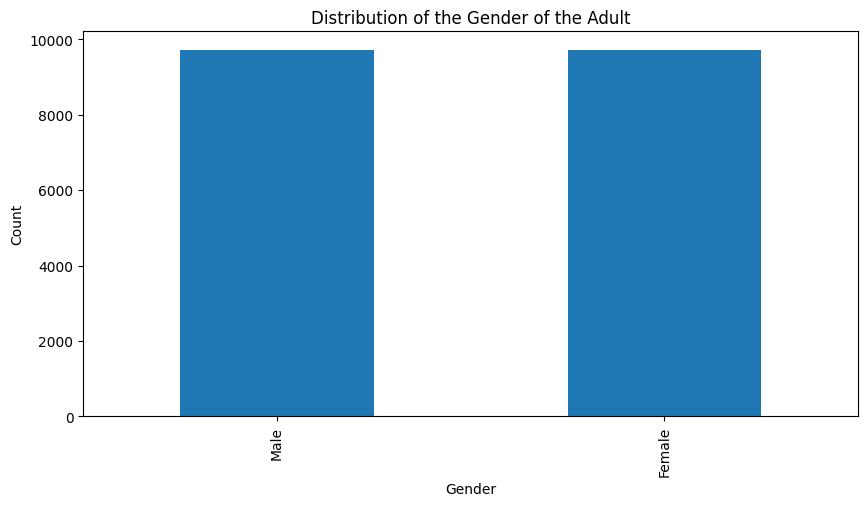

In [35]:
# Distribution of the Gender of the Adult.
plt.figure(figsize=[10, 5])
df['Gender of the Adult'].value_counts().plot(kind='bar')
plt.title("Distribution of the Gender of the Adult")
plt.xlabel("Gender")
plt.ylabel('Count')
plt.show()

In [36]:
# Rename 'Age band of the Adult' column to 'Age'.
df.rename(columns={'Gender of the Adult': 'Gender'}, inplace=True)

In [37]:
# Checking unique values in the 'Age band of the Adult' column.
df['Age band of the Adult'].unique()

array(['16 to 24 (adult) (adult)', '25 to 34', '35 to 44', '45 to 54',
       '55 to 59', '60 to 64', '65 to 74 (age)', '75 to 84', '85 or over'],
      dtype=object)

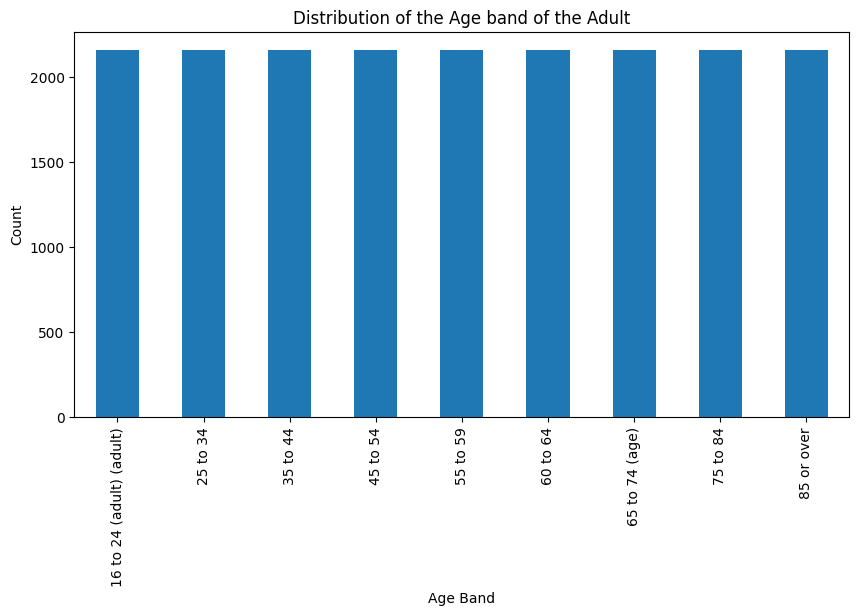

In [38]:
# Distribution of the Age band of the Adult.
plt.figure(figsize=[10, 5])
df['Age band of the Adult'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of the Age band of the Adult")
plt.xlabel("Age Band")
plt.ylabel('Count')
plt.show()

In [39]:
# Cleaning 'Age band of the Adult' column.
df['Age band of the Adult'] = df['Age band of the Adult'].map({
    '16 to 24 (adult) (adult)' : '16 - 24',
    '25 to 34' : '25 - 34',
    '35 to 44' : '35 - 44',
    '45 to 54' : '45 - 54',
    '55 to 59' : '55 - 59',
    '60 to 64' : '60 - 64',
    '65 to 74 (age)' : '65 -74',
    '75 to 84' : '75 - 84',
    '85 or over' : '85 or over'
}).fillna('Unknown')

In [40]:
# Rename 'Age band of the Adult' column to 'Age'.
df.rename(columns={'Age band of the Adult': 'Age_Band'}, inplace=True)

In [41]:
df.head()

,Financial Year,Gender,Age_Band,Disability Status of the Adult (dis),"Employment Status of the Adult (high level breakdowns) (emp, ftpt)",Government office region of the Household in the United Kingdom,"Adult total, net Income received from all sources, in bands, in latest prices (weekly, CPI adjusted real terms) (colpall, cpi, dividend, inc, netinc, real, sc)",Count
0,2022-23,Male,16 - 24,Not a disabled child / adult / person,Employee,North East (E12000001),Less than £50,..
1,2022-23,Male,16 - 24,Not a disabled child / adult / person,Employee,North East (E12000001),£50 - £99.99,..
2,2022-23,Male,16 - 24,Not a disabled child / adult / person,Employee,North East (E12000001),£100 - £149.99,..
3,2022-23,Male,16 - 24,Not a disabled child / adult / person,Employee,North East (E12000001),£150 - £199.99,4762
4,2022-23,Male,16 - 24,Not a disabled child / adult / person,Employee,North East (E12000001),£200 - £249.99,4424


In [42]:
# Looking for unique values in the 'Disability Status of the Adult (dis)'.
df['Disability Status of the Adult (dis)'].unique()

array(['Not a disabled child / adult / person',
       'Disabled child / adult / person'], dtype=object)

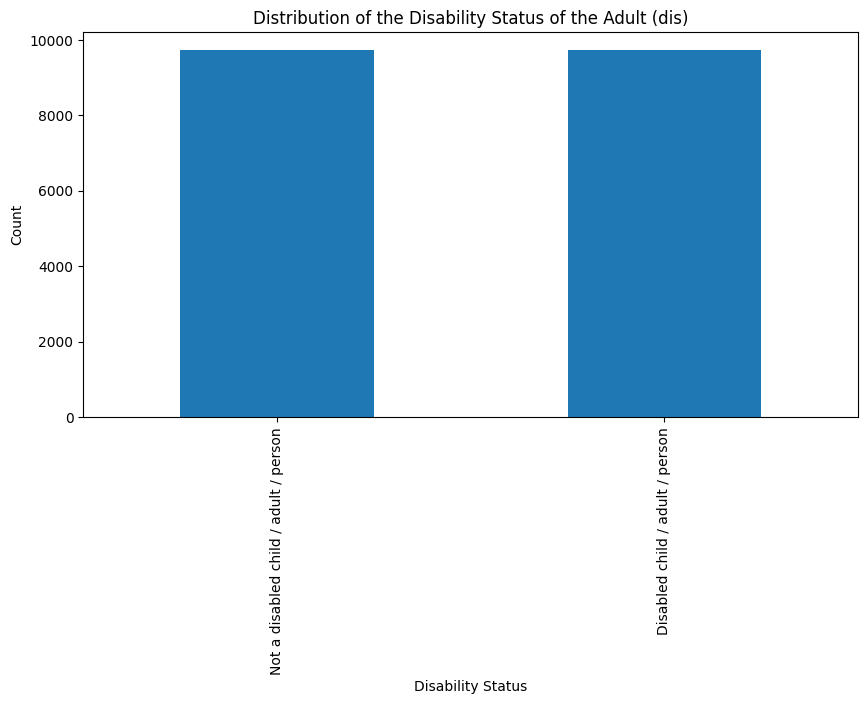

In [43]:
# Distribution of the 'Disability Status of the Adult (dis)'.
plt.figure(figsize=[10,5])
df['Disability Status of the Adult (dis)'].value_counts().plot(kind='bar')
plt.title("Distribution of the Disability Status of the Adult (dis)")
plt.xlabel("Disability Status")
plt.ylabel('Count')
plt.show()

In [44]:
# Cleaning 'Disability Status of the Adult (dis)' column.
df.rename(columns={'Disability Status of the Adult (dis)' : 'Disability_Status'}, 
    inplace=True
)

df['Disability_Status'] = df['Disability_Status'].map({
    'Not a disabled child / adult / person' : 'Not a disabled',
    'Disabled child / adult / person' : 'Disabled'
}).fillna('Unknown')

df.head()

,Financial Year,Gender,Age_Band,Disability_Status,"Employment Status of the Adult (high level breakdowns) (emp, ftpt)",Government office region of the Household in the United Kingdom,"Adult total, net Income received from all sources, in bands, in latest prices (weekly, CPI adjusted real terms) (colpall, cpi, dividend, inc, netinc, real, sc)",Count
0,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),Less than £50,..
1,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£50 - £99.99,..
2,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£100 - £149.99,..
3,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£150 - £199.99,4762
4,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£200 - £249.99,4424


In [45]:
df.groupby('Disability_Status')['Count'].sum()

Disability_Status
Disabled          2615......2217208842564036..18191286....1372.....
Not a disabled    ......4762442438051572617206811229045411119831...
Name: Count, dtype: object

In [46]:
# Rename 'Employment Status of the Adult (high level breakdowns) (emp, 
# ftpt)'column name.
df.rename(
    columns={'Employment Status of the Adult (high level breakdowns) (emp, ftpt)' \
            : 'Employment_Status',
            'Government office region of the Household in the United Kingdom' \
            : 'Region_of_the_Household',
            'Adult total, net Income received from all sources, in bands, in latest prices (weekly, CPI adjusted real terms) (colpall, cpi, dividend, inc, netinc, real, sc)' \
            : 'Net_Income_Received_from_all_sources_Weekly'
    }, 
    inplace=True
)
df.head()

,Financial Year,Gender,Age_Band,Disability_Status,Employment_Status,Region_of_the_Household,Net_Income_Received_from_all_sources_Weekly,Count
0,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),Less than £50,..
1,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£50 - £99.99,..
2,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£100 - £149.99,..
3,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£150 - £199.99,4762
4,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£200 - £249.99,4424


In [47]:
# Droping first three rows, because the count column have missing values.
df = df.iloc[3:].reset_index(drop=True)
df.head()

,Financial Year,Gender,Age_Band,Disability_Status,Employment_Status,Region_of_the_Household,Net_Income_Received_from_all_sources_Weekly,Count
0,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£150 - £199.99,4762
1,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£200 - £249.99,4424
2,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£250 - £299.99,3805
3,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£300 - £399.99,15726
4,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£400 - £499.99,17206


In [48]:
# Looking for unique values in the 'Employment Status of the Adult (high
#  level breakdowns) (emp, ftpt)' column.
df['Employment_Status'].unique()

array(['Employee', 'Self-employed (setyp)', 'Unemployed', 'Retired',
       'Other economically inactive (oei)'], dtype=object)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19437 entries, 0 to 19436
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Financial Year                               19437 non-null  object
 1   Gender                                       19437 non-null  object
 2   Age_Band                                     19437 non-null  object
 3   Disability_Status                            19437 non-null  object
 4   Employment_Status                            19437 non-null  object
 5   Region_of_the_Household                      19437 non-null  object
 6   Net_Income_Received_from_all_sources_Weekly  19437 non-null  object
 7   Count                                        19437 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [50]:
# Converting 'Count' column to the int type.
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')


In [51]:
df.head()

,Financial Year,Gender,Age_Band,Disability_Status,Employment_Status,Region_of_the_Household,Net_Income_Received_from_all_sources_Weekly,Count
0,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£150 - £199.99,4762.0
1,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£200 - £249.99,4424.0
2,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£250 - £299.99,3805.0
3,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£300 - £399.99,15726.0
4,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£400 - £499.99,17206.0


<Axes: xlabel='Gender'>

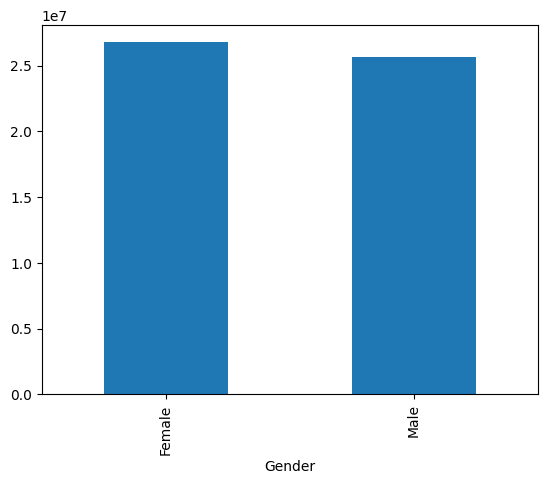

In [52]:
df.groupby('Gender')['Count'].sum().plot(kind='bar')

<Axes: ylabel='Region_of_the_Household'>

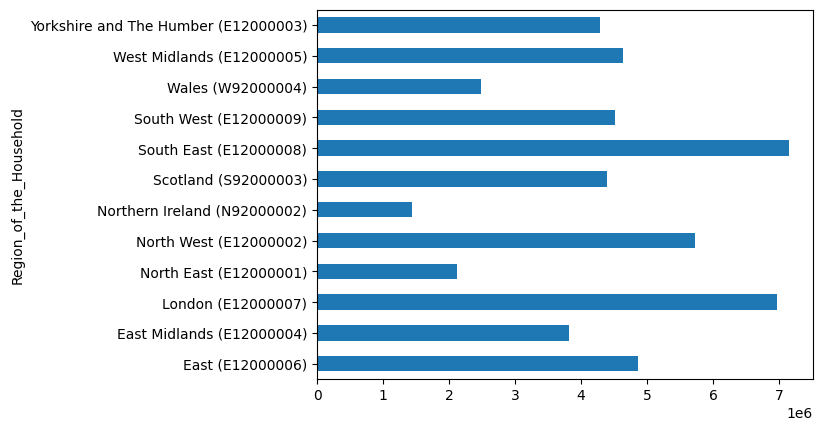

In [53]:
df.groupby('Region_of_the_Household')['Count'].sum().plot(kind='barh')

In [54]:
df.head()

,Financial Year,Gender,Age_Band,Disability_Status,Employment_Status,Region_of_the_Household,Net_Income_Received_from_all_sources_Weekly,Count
0,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£150 - £199.99,4762.0
1,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£200 - £249.99,4424.0
2,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£250 - £299.99,3805.0
3,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£300 - £399.99,15726.0
4,2022-23,Male,16 - 24,Not a disabled,Employee,North East (E12000001),£400 - £499.99,17206.0


<Axes: ylabel='Disability_Status'>

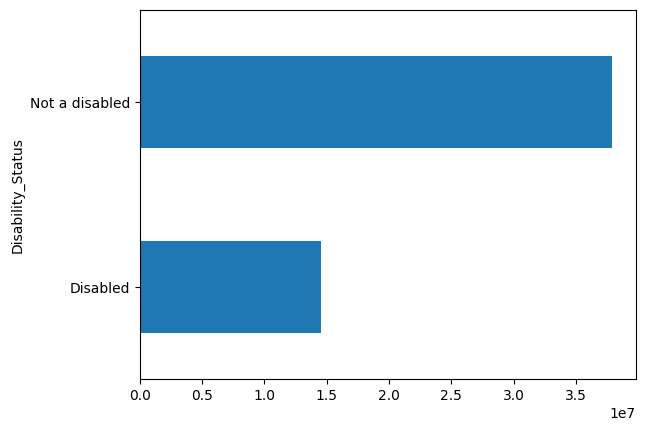

In [55]:
df.groupby('Disability_Status')['Count'].sum().plot(kind='barh')

<Axes: ylabel='Employment_Status'>

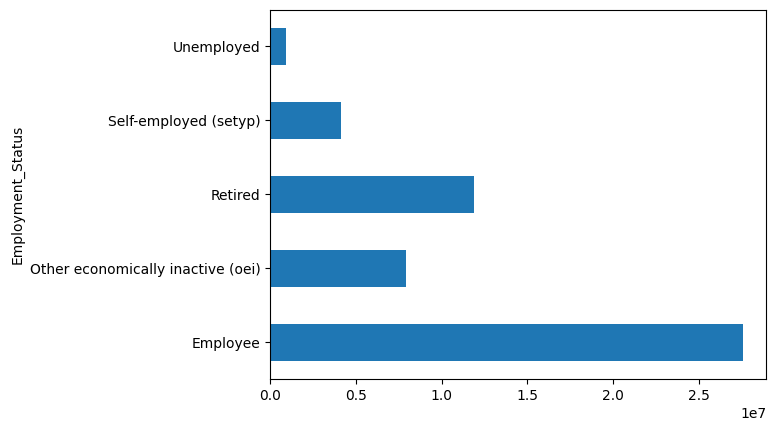

In [56]:
df.groupby('Employment_Status')['Count'].sum().plot(kind='barh')

<Axes: ylabel='Net_Income_Received_from_all_sources_Weekly'>

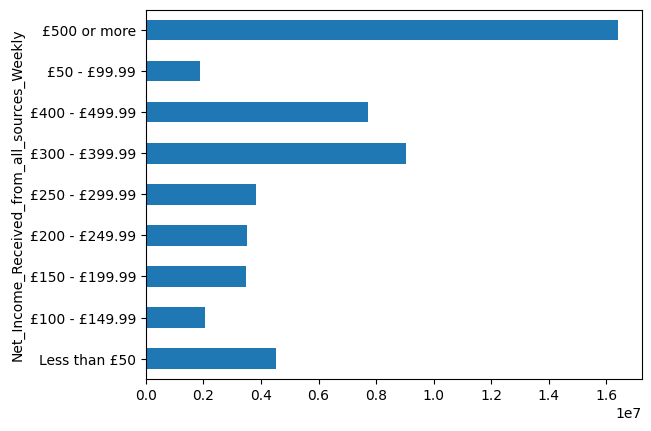

In [59]:
df.groupby('Net_Income_Received_from_all_sources_Weekly')['Count'].sum().plot(kind='barh')

<Axes: xlabel='Net_Income_Received_from_all_sources_Weekly', ylabel='Count'>

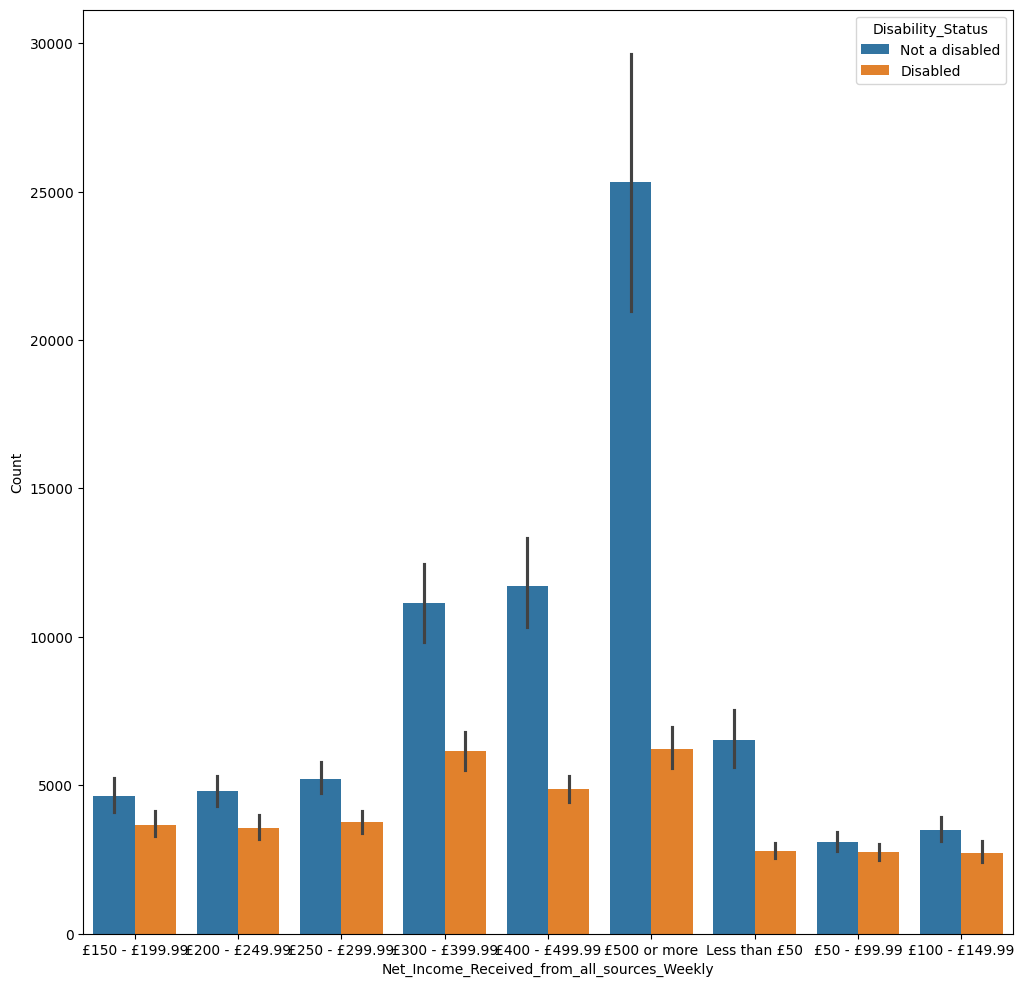

In [68]:
plt.figure(figsize=[12,12])
sns.barplot(data=df, x='Net_Income_Received_from_all_sources_Weekly', y='Count', hue='Disability_Status')